<a href="https://colab.research.google.com/github/nikhilrangaram/Covid-19-detection-using-cnn/blob/main/Covid_19_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Detection Using CNN

Mounting the google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


All the libraries are imported here.

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Sample Image(Normal)

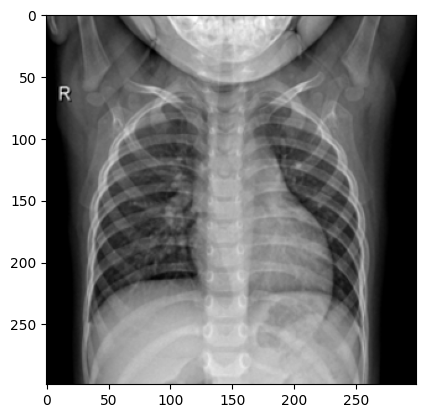

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/Normal/images/Normal-106.png')
plt.imshow(img)
plt.show()

Sample Image(Covid)

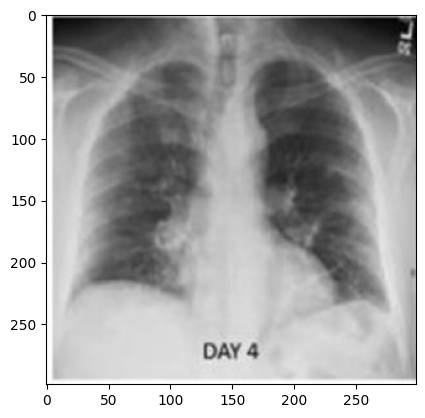

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/COVID/images/COVID-300.png')
plt.imshow(img)
plt.show()

Loads the metadata from the excel sheet and retrives the list of image filenames in the corresponding images directory.


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/dataset/COVID.metadata.xlsx')
urls = os.listdir('/content/drive/MyDrive/dataset/COVID/images')
path = "/content/drive/MyDrive/dataset/COVID/images/" + urls[0]

df = pd.read_excel('/content/drive/MyDrive/dataset/Normal.metadata.xlsx')
urls = os.listdir('/content/drive/MyDrive/dataset/Normal/images')
path = "/content/drive/MyDrive/dataset/Normal/images/" + urls[0]


Function loads the images and preprocess them and store in the images list and targets list separately and returns the lists.

In [ ]:
def loadImages(path, urls, target):#image preprocessing
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = path + "/" + urls[i]
        img = cv2.imread(img_path)
        img = img / 255.0
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(target)
    images = np.asarray(images)
    return images, labels

sets the path to the directory containing covid images and loads the images and targets

In [ ]:
covid_path = "/content/drive/MyDrive/dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

sets the path to the directory containing normal images and loads the images and targets.

In [ ]:
normal_path = "/content/drive/MyDrive/dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

Merging all the images and respective targets into 2 arrays.

In [ ]:
data = np.r_[covidImages, normalImages]
targets = np.r_[covidTargets, normalTargets]

Split the dataset into 2 parts, 70% for training and 30% testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.3)

Model with convolutional, max-pooling and activation functions.

In [ ]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100, 100, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

For adaptive learning learning rate adam is used.
Adam optimizer is widely used in deep learning because it offers a good balance between adaptivity, efficiency, and convergence speed.
The model is trained with 6 epochs to get better accuracy.


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=6, validation_data=(x_test, y_test))

Epoch 1/6
44/44 [==============================] - 24s 488ms/step - loss: 0.3006 - accuracy: 0.8939 - val_loss: 0.1439 - val_accuracy: 0.9635
Epoch 2/6
44/44 [==============================] - 21s 476ms/step - loss: 0.1566 - accuracy: 0.9487 - val_loss: 0.1370 - val_accuracy: 0.9486
Epoch 3/6
44/44 [==============================] - 23s 528ms/step - loss: 0.1385 - accuracy: 0.9573 - val_loss: 0.1569 - val_accuracy: 0.9602
Epoch 4/6
44/44 [==============================] - 20s 447ms/step - loss: 0.1328 - accuracy: 0.9580 - val_loss: 0.1232 - val_accuracy: 0.9602
Epoch 5/6
44/44 [==============================] - 23s 517ms/step - loss: 0.1263 - accuracy: 0.9573 - val_loss: 0.1143 - val_accuracy: 0.9635
Epoch 6/6
44/44 [==============================] - 21s 475ms/step - loss: 0.1052 - accuracy: 0.9630 - val_loss: 0.1286 - val_accuracy: 0.9585


Graph shows both training and test accuracy with respect to the epochs.

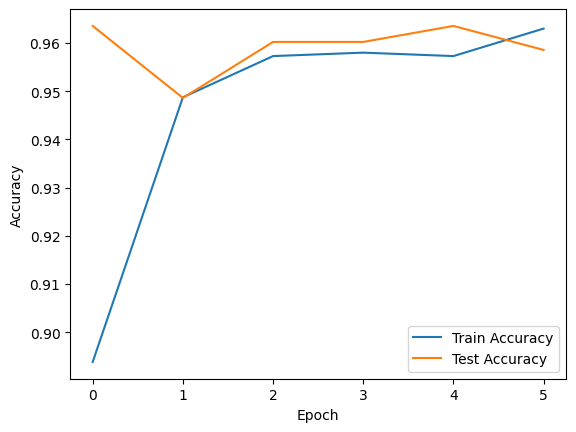

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Displays the final train and test accuracy.

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Train Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)

Final Train Accuracy: 0.9665242433547974
Final Test Accuracy: 0.9585406184196472


Function which takes new image path, preprocess the image and predicts the image whether it is positive or negative.

In [ ]:
def classify_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    print(prediction[0][0])
    if prediction[0][0] > 0.5:
        return 'COVID'
    else:
        return 'Not COVID'

new_image_path = '/content/drive/MyDrive/new_data/Normal/Normal-1745.png'
classification = classify_image(new_image_path)
print('Classification:', classification)

1/1 [==============================] - 0s 139ms/step
0.066131435
Classification: Not COVID
